<a href="https://colab.research.google.com/github/daeyeong8855/statistical_data_analysis/blob/main/%ED%86%B5%EA%B3%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%9D%B4%EC%83%81%EC%B9%98_%ED%83%90%EC%A7%80_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 이상치 탐지 및 처리

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
# 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100)

# 이상치 추가
values[15] = 70

# 데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

In [9]:
# 이상치 탐지
z_scores = np.abs(stats.zscore(data['Value']))

# 임계치 설정
thredhold = 3

# z-scores 임계값 초과 체크
outliers = z_scores > thredhold

# 이상치 -> 결측치로 처리
data.loc[outliers, 'Value'] = np.nan

# 결측치 보간
data['Value'] = data['Value'].interpolate()


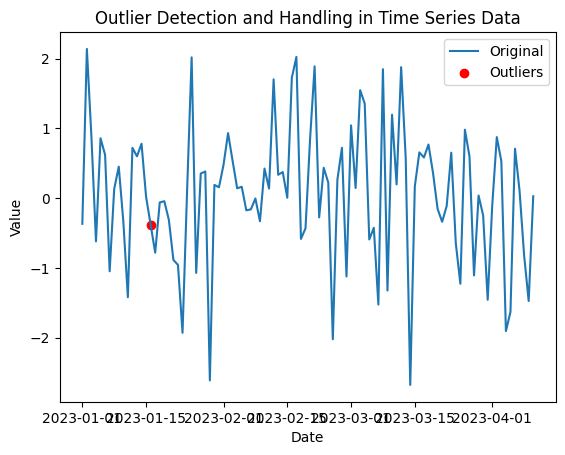

이상치 처리된 데이터 확인 >>  -0.38106129110007325


In [11]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection and Handling in Time Series Data')
plt.legend()
plt.show()


# 처리된 데이터 확인
print("이상치 처리된 데이터 확인 >> " , data['Value'].iloc[15])